Script para decomposição de série temporal 

Observações sobre séries temporais: 
> Uma série temporal consiste em um conjunto de observações ordenadas no tempo sobre um determinado fenômeno (variável-alvo). Normalmente, as medidas da série são igualmente espaçadas, por exemplo, por ano, mês, semana, dia. A propriedade mais importante de uma série cronológica é que as observações ordenadas são dependentes do tempo. 
> Uma série temporal é composta, basicamente, por 3 elementos: 
   * Sazonalidade
   * Tendência 
   * Resíduo 

> A decomposição das séries temporais é a sua decomposição em componentes não-observáveis que podem ser associados a diferentes tipos de variações temporais. 

> Realizar uma decomposição de série temporal é um dos melhores caminhos para avaliar como cada um dos componentes se comporta. 

>> Neste exemplo, realizei a decomposição de uma série temporal climática - a qual contém variáveis de interesse agrônomico para avaliação da produção anual de macieiras. 

>> O objetivo foi apenas experimental e educacional, buscando realizar testes com o pacote stl () para avaliar o comportamento das séries temporais. 

In [ ]:
# Importação das bibliotecas 
install.packages("readxl")
library(readxl)
install.packages("tidyr")
install.packages("tidyverse")
library(tidyr)
library(tidyverse)
install.packages("dplyr")
library(dplyr)
install.packages("corrplot")
library(corrplot)
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("lubridate")
library(lubridate)
install.packages("dygraphs")
library(dygraphs)
install.packages("xts")
library(xts)
install.packages("tsbox")
library(tsbox)

In [4]:
# Leitura do banco de dados climáticos 
  # O banco de dados contém variáveis climáticas relativas à: Temperatura máxima, Temperatura mínima, Temperatura média, Radiação solar, Precipitação, Evapotranspiração, Graus Dia e Horas Frio
  # Os dados estão em frequência diária 

dados_clima = read_excel("BancoDados_clima.xlsx")


In [6]:
# Visualização da planilha 
head(dados_clima)
tail(dados_clima)


Data,Dia,Mês,Ano,Temp_max,Temp_min,Temp_media,Radiacao_acum,Precip,GD,Eto,HorasFrio
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008-04-26,26,4,2008,15.644444,14.344444,14.994444,3.0950,4.0,4.994444,1.7989028,1
2008-04-27,27,4,2008,16.891667,15.512500,16.202083,17.2396,0.0,6.202083,4.2977587,0
2008-04-28,28,4,2008,15.395833,14.550000,14.972917,2.1743,46.8,4.972917,0.6192767,0
2008-04-29,29,4,2008,13.970833,13.312500,13.641667,4.2373,11.4,3.641667,0.9281582,0
2008-04-30,30,4,2008,6.595833,5.287500,5.941667,19.4614,0.2,0.000000,3.4770749,16
2008-05-01,1,5,2008,8.366667,7.091667,7.729167,9.7194,0.0,0.000000,1.9026256,14


Data,Dia,Mês,Ano,Temp_max,Temp_min,Temp_media,Radiacao_acum,Precip,GD,Eto,HorasFrio
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-04-25,25,4,2022,17.33333,16.18333,16.75833,14.4001,0.0,6.758333,3.6307719,0
2022-04-26,26,4,2022,16.58333,15.96250,16.27292,1.8457,5.0,6.272917,0.7258125,0
2022-04-27,27,4,2022,21.08750,19.95000,20.51875,17.7411,0.4,10.518750,5.0830510,0
2022-04-28,28,4,2022,18.07083,16.41667,17.24375,11.3881,13.4,7.243750,2.9556023,0
2022-04-29,29,4,2022,14.20833,13.09583,13.65208,19.0322,0.4,3.652083,4.1434832,0
2022-04-30,30,4,2022,12.82500,12.35000,12.58750,3.0703,39.2,2.587500,0.7467637,0


In [7]:
# Visualização das características da variáveis 
glimpse (dados_clima)

Rows: 5,118
Columns: 12
$ Data          <dttm> 2008-04-26, 2008-04-27, 2008-04-28, 2008-04-29, 2008-04…
$ Dia           <dbl> 26, 27, 28, 29, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1…
$ Mês           <dbl> 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Ano           <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 20…
$ Temp_max      <dbl> 15.644444, 16.891667, 15.395833, 13.970833, 6.595833, 8.…
$ Temp_min      <dbl> 14.344444, 15.512500, 14.550000, 13.312500, 5.287500, 7.…
$ Temp_media    <dbl> 14.994444, 16.202083, 14.972917, 13.641667, 5.941667, 7.…
$ Radiacao_acum <dbl> 3.0950, 17.2396, 2.1743, 4.2373, 19.4614, 9.7194, 3.8225…
$ Precip        <dbl> 4.0, 0.0, 46.8, 11.4, 0.2, 0.0, 22.4, 5.8, 4.2, 0.4, 0.0…
$ GD            <dbl> 4.994444444, 6.202083333, 4.972916667, 3.641666667, 0.00…
$ Eto           <dbl> 1.7989028, 4.2977587, 0.6192767, 0.9281582, 3.4770749, 1…
$ HorasFrio     <dbl> 1, 0, 0, 0, 16, 14, 0, 0, 0, 0, 7, 12, 7, 14, 13, 10, 1,…


In [8]:
# Visualização do período temporal dos dados 
range(dados_clima$Data)

[1] "2008-04-26 UTC" "2022-04-30 UTC"

In [9]:
# Organização do dataframe

#remoção coluna de Dia, Mês e Ano - essas colunas não serão necessárias para os procedimentos 
dados_clima_correct <- select(dados_clima, -Dia, -Mês, -Ano)

#duplicando o data frame para conservar os dados originais
data2 <- dados_clima_correct

#criar uma coluna referente ao Mês/Ano no data2 - função floor_data (pacote lubridate) - os dados são acumulados na frequência mensal 
data2$year_month <- floor_date(data2$Data, 
                                  "month")

#acumular os dados por Mês (pacote dplyr)
data_aggr <- data2 %>%
  group_by(year_month) %>%
  dplyr::summarize(Temp_max = mean(Temp_max), Temp_min = mean(Temp_min), Temp_media = mean(Temp_media),
                    Radiacao_acum = mean(Radiacao_acum), Precip = sum(Precip), GD = sum(GD),
                    Eto = mean(Eto), HorasFrio = sum(HorasFrio)) %>%
                    as.data.frame()

#verificação da presença de NA na planilha 
#is.na(data_aggr) %>% table()

#remoção na 
dado_serie_temporal <- na.omit(data_aggr)
#is.nao(dado_serie_temporal) %>% table()

In [ ]:
# Visualizar estatísticas de cada variável do df
summary(dado_serie_temporal)

In [10]:
#xts() cria um objeto de serie temporal
ts_historica2 <- xts(dado_serie_temporal[,c("Temp_max", "Temp_min", "Temp_media", "Radiacao_acum", "Precip", "GD", "Eto", "HorasFrio")], 
                  order.by = as.Date(dado_serie_temporal$year_month))

# ts_regular()  
ts_historica2 <- ts_regular(ts_historica2)

ts_historica2 <- na.fill(ts_historica2, "extend")

#range(dados_clima_correct$Data)
ts_historica2 <- window(ts_historica2, start=as.Date("2008-04-01"), end=as.Date("2022-04-01"))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  93.12  134.37  144.33  149.66  169.74  195.00 

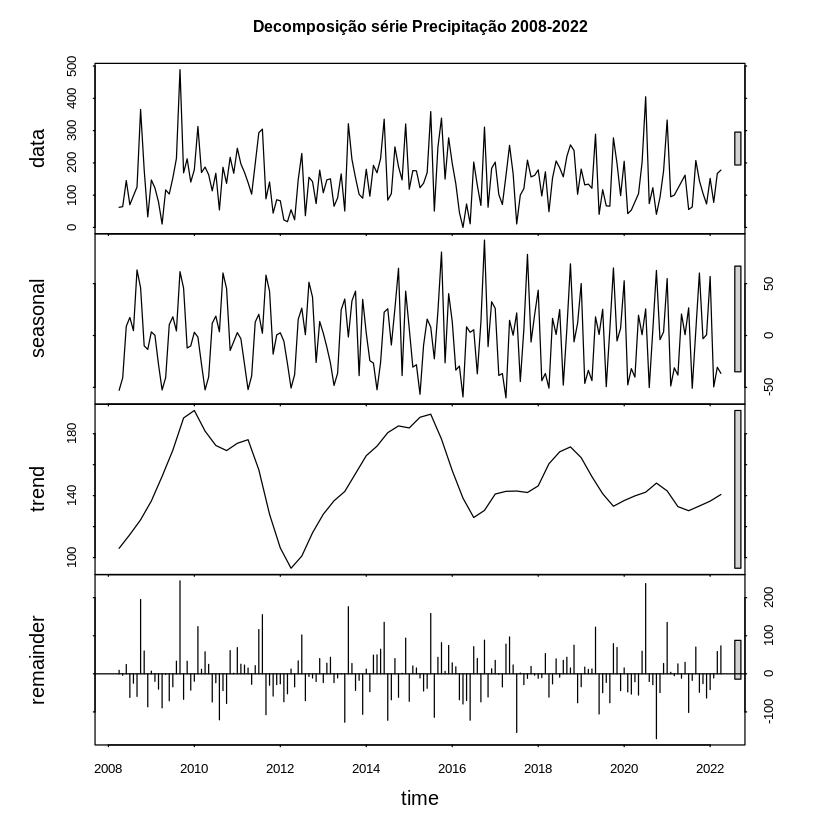

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.33   16.11   16.47   16.43   16.77   17.37 

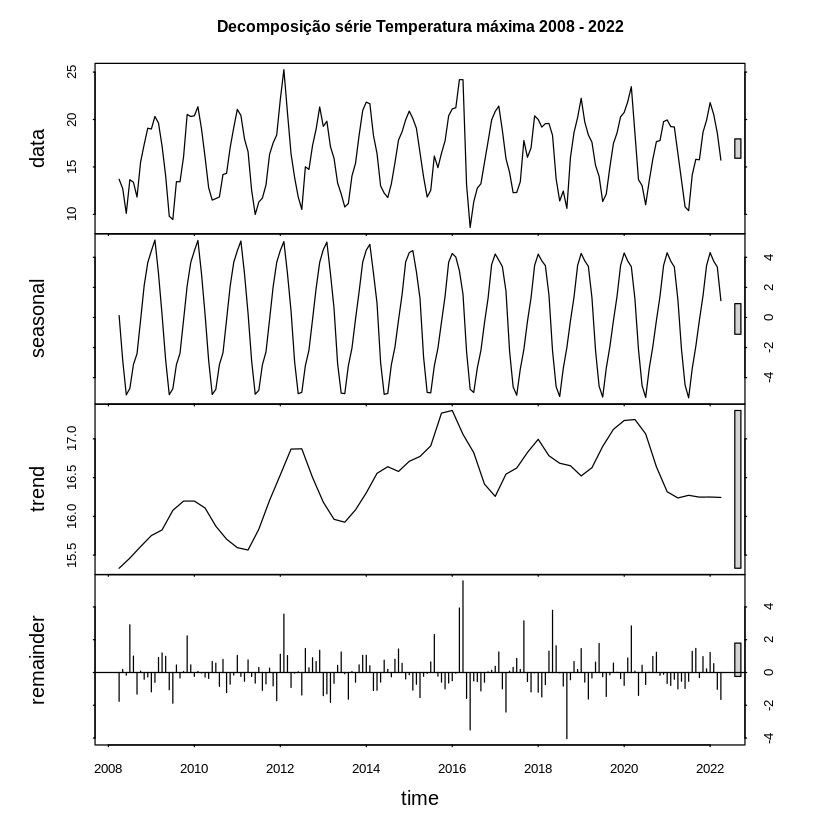

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.06   14.69   15.04   15.05   15.43   15.78 

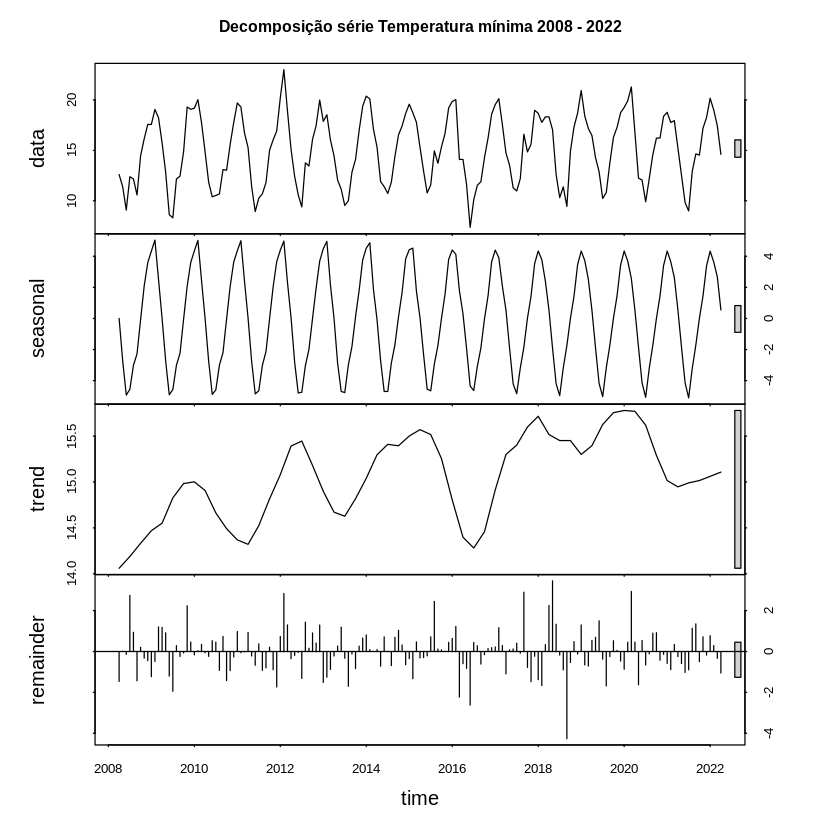

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.70   15.47   15.71   15.74   16.09   16.51 

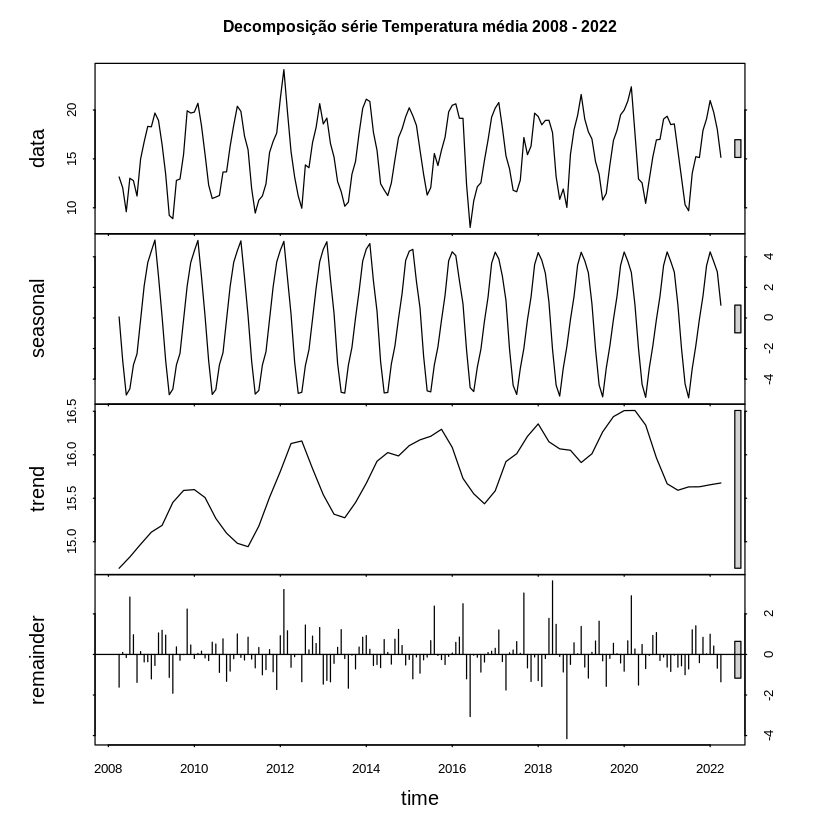

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.14   15.97   16.52   16.37   16.80   17.45 

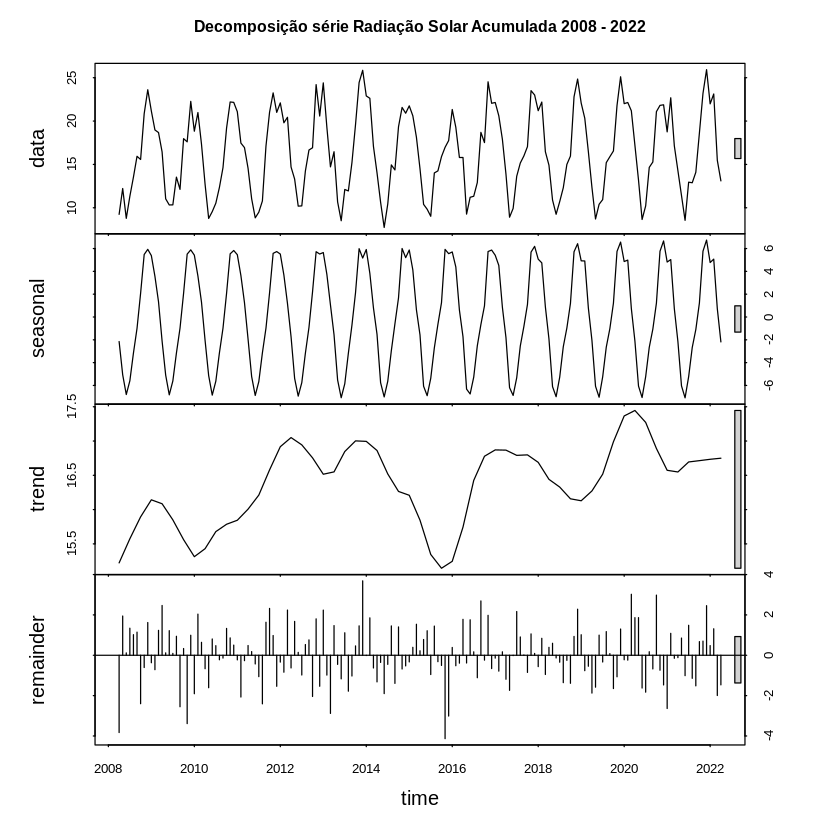

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.51   51.63   66.26   70.80   76.72  139.01 

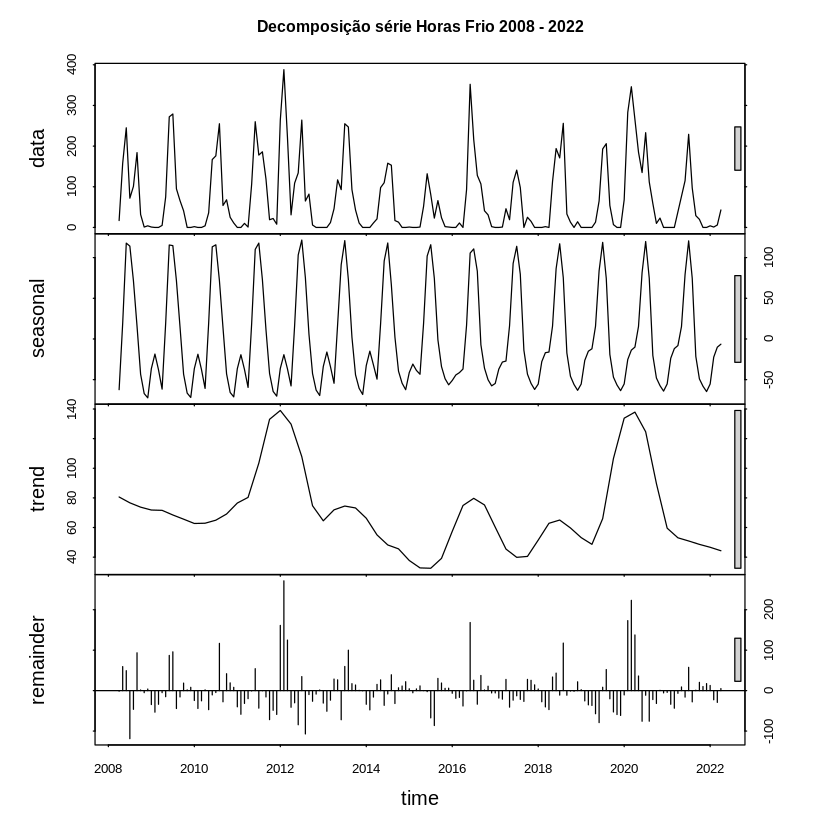

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.278   3.893   4.123   4.074   4.248   4.612 

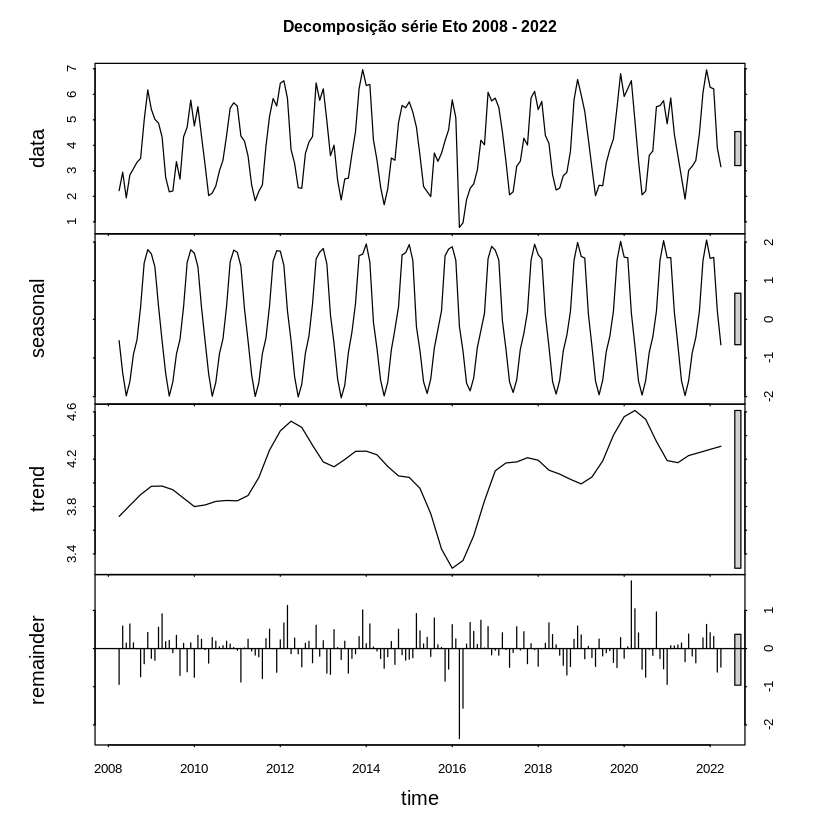

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  134.1   177.3   183.9   183.2   193.3   207.9 

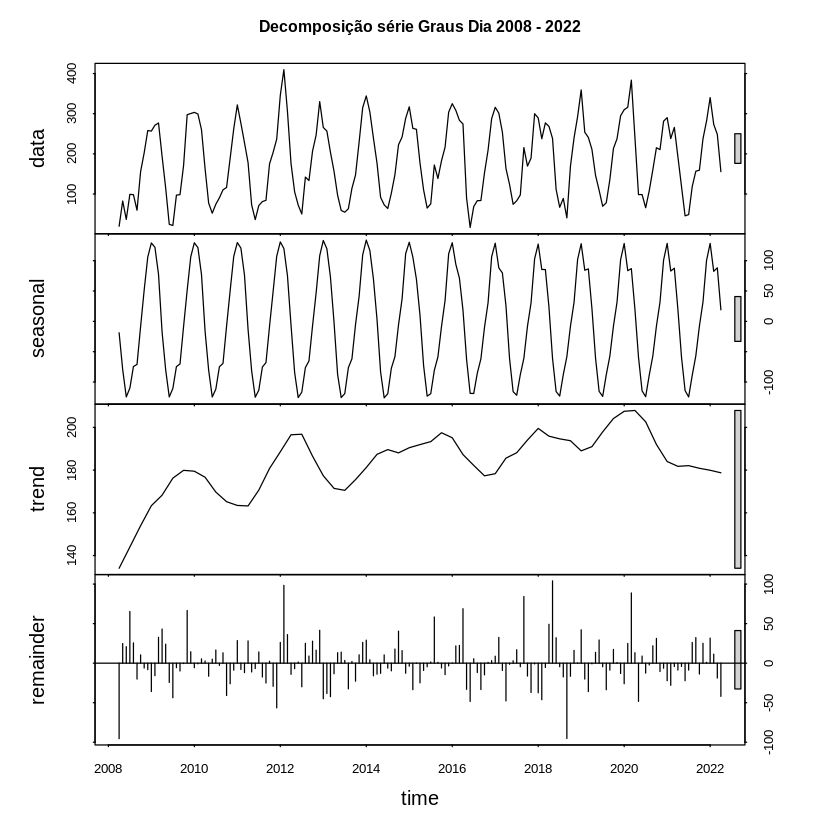

In [14]:
# Decomposição da série temporal de cada uma das variáveis - biblioteca stl ()
    # A biblioteca stl () realiza a decomposição por meio da função LOESS

  #Precipitação 
  decompose_Precip = stl(ts_ts(ts_historica2$Precip), s.window = 10) 
  plot(decompose_Precip, main = "Decomposição série Precipitação 2008-2022")
  summary(decompose_Precip$time.series[,"trend"])

  #Temperatura máxima
  decompose_Tempmax = stl(ts_ts(ts_historica2$Temp_max), s.window = 10)
  plot(decompose_Tempmax, main = "Decomposição série Temperatura máxima 2008 - 2022")
  summary(decompose_Tempmax$time.series[,"trend"])

  # Temperatura mínima
  decompose_Tempmin = stl(ts_ts(ts_historica2$Temp_min), s.window = 10)
  plot(decompose_Tempmin, main = "Decomposição série Temperatura mínima 2008 - 2022")
  summary(decompose_Tempmin$time.series[,"trend"])

  # Temperatura média
  decompose_Tempmed = stl(ts_ts(ts_historica2$Temp_media), s.window = 10)
  plot(decompose_Tempmed, main = "Decomposição série Temperatura média 2008 - 2022")
  summary(decompose_Tempmed$time.series[,"trend"])

  # Radiação solar acumulada
  decompose_RadAcum = stl(ts_ts(ts_historica2$Radiacao_acum), s.window = 10)
  plot(decompose_RadAcum, main = "Decomposição série Radiação Solar Acumulada 2008 - 2022")
  summary(decompose_RadAcum$time.series[,"trend"])

  #Horas frio
  decompose_HF = stl(ts_ts(ts_historica2$HorasFrio), s.window = 10)
  plot(decompose_HF, main = "Decomposição série Horas Frio 2008 - 2022")
  summary(decompose_HF$time.series[,"trend"])

  #Eto
  decompose_Eto = stl(ts_ts(ts_historica2$Eto), s.window = 10) #s.window= 10 anos para 'identificar' a sazonalidade
  plot(decompose_Eto, main = "Decomposição série Eto 2008 - 2022")
  summary(decompose_Eto$time.series[,"trend"])

  #Graus Dia
  decompose_GD = stl(ts_ts(ts_historica2$GD), s.window = 10)
  plot(decompose_GD, main = "Decomposição série Graus Dia 2008 - 2022")
  summary(decompose_GD$time.series[,"trend"])

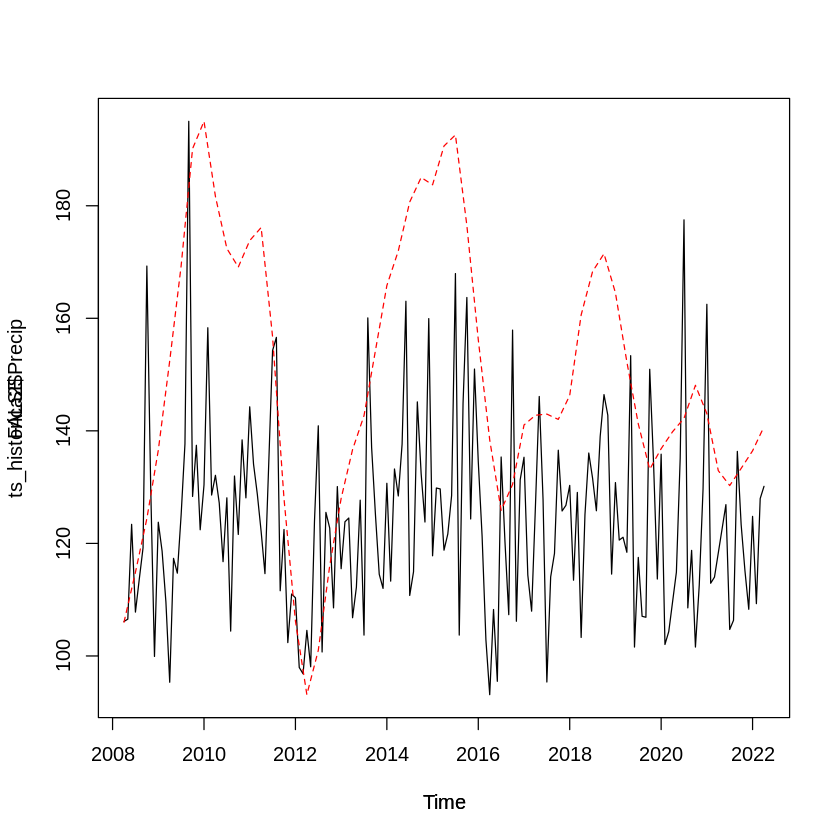

In [15]:
# Avaliação da tendência da série (por variável) - plotagem do gráfico com a série temporal e a sua tendência 
  #Abaixo está o exemplo da variável de Precipitação; para plotar as demais, basta substituir o nome da variável de interesse

#Precipitação
plot.ts(ts_historica2$Precip, axes=FALSE)
par(new=TRUE)
plot(decompose_Precip$time.series[,"trend"],
        col = "red", lwd = 1, lty =2, ylab=FALSE)

